# ML-Based Hidden State Detection in smFRET Traces of RNA-Binding Proteins
This notebook simulates smFRET data from a hypothetical RNA-binding protein (e.g., helicase), and uses Hidden Markov Models (HMMs) to infer the hidden conformational states from noisy FRET trajectories.

In [2]:
!pip3 install numpy pandas matplotlib hmmlearn seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.6/10.6 MB 28.0 MB/s eta 0:00:00 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.7/20.7 MB 30.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [hmmlearn]4/5 [hmmlearn]arn]


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

In [7]:
# Simulate a 2-state smFRET signal
def simulate_fret_trace(n_frames=500, low_fret=0.3, high_fret=0.7,
                        transition_prob=0.01, noise_std=0.05, seed=42):
    np.random.seed(seed)
    states = [0]
    for _ in range(1, n_frames):
        if np.random.rand() < transition_prob:
            states.append(1 - states[-1])
        else:
            states.append(states[-1])
    fret_values = [np.random.normal(low_fret if s == 0 else high_fret, noise_std)
                   for s in states]
    fret_values = np.clip(fret_values, 0, 1)
    df = pd.DataFrame({"Frame": np.arange(n_frames), "State": states, "FRET": fret_values})
    return df

# Create the trace
fret_df = simulate_fret_trace()
fret_df.head()

,Frame,State,FRET
0,0,0,0.204365
1,1,0,0.318124
2,2,0,0.328567
3,3,0,0.348526
4,4,0,0.337098


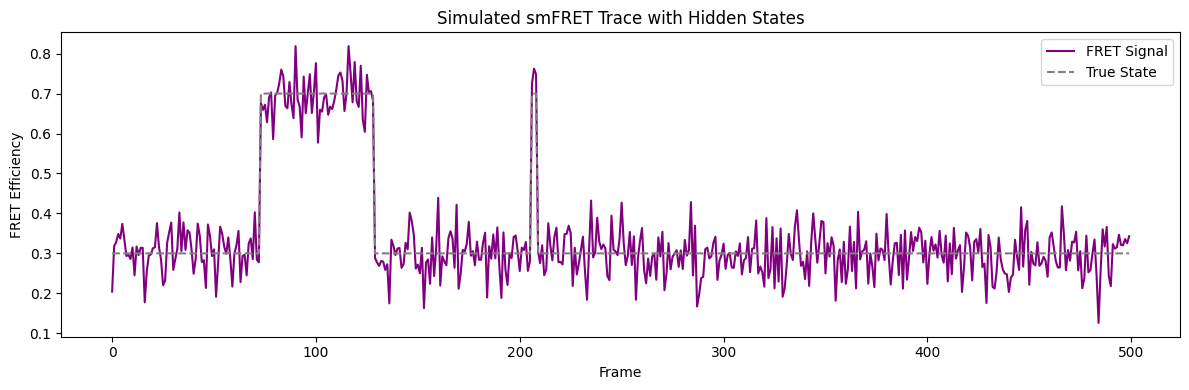

In [8]:
# Plot the simulated trace
plt.figure(figsize=(12, 4))
plt.plot(fret_df['Frame'], fret_df['FRET'], label='FRET Signal', color='purple')
plt.plot(fret_df['Frame'], fret_df['State'] * 0.4 + 0.3, '--', label='True State', color='gray')
plt.xlabel('Frame')
plt.ylabel('FRET Efficiency')
plt.title('Simulated smFRET Trace with Hidden States')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
# Fit a Gaussian HMM to infer hidden states
model = hmm.GaussianHMM(n_components=2, covariance_type='diag', n_iter=100, random_state=42)
model.fit(fret_df[['FRET']])
predicted_states = model.predict(fret_df[['FRET']])

# Ensure state 0 is the low-FRET state
if model.means_.flatten()[0] > model.means_.flatten()[1]:
    predicted_states = 1 - predicted_states
fret_df['Predicted_State'] = predicted_states
fret_df.head()

,Frame,State,FRET,Predicted_State
0,0,0,0.204365,0
1,1,0,0.318124,0
2,2,0,0.328567,0
3,3,0,0.348526,0
4,4,0,0.337098,0


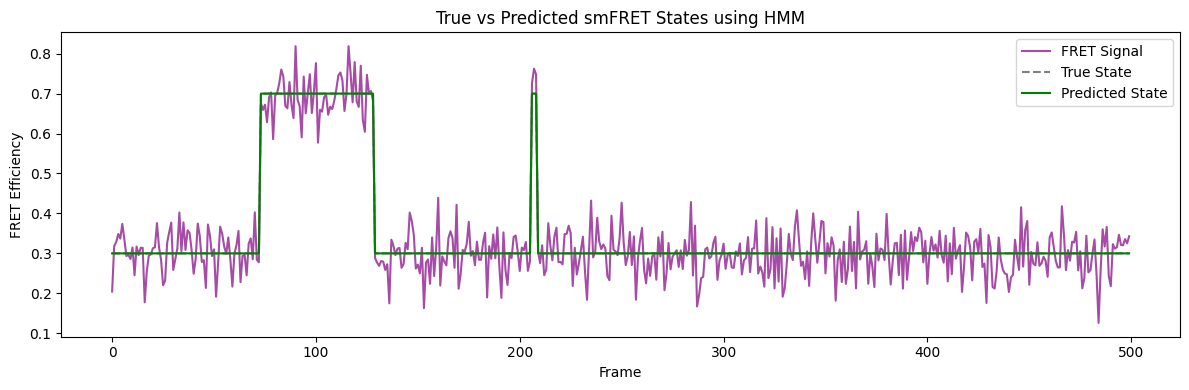

In [10]:
# Plot comparison of true vs predicted states
plt.figure(figsize=(12, 4))
plt.plot(fret_df['Frame'], fret_df['FRET'], label='FRET Signal', color='purple', alpha=0.7)
plt.plot(fret_df['Frame'], fret_df['State'] * 0.4 + 0.3, '--', label='True State', color='gray')
plt.plot(fret_df['Frame'], fret_df['Predicted_State'] * 0.4 + 0.3, '-', label='Predicted State', color='green')
plt.xlabel('Frame')
plt.ylabel('FRET Efficiency')
plt.title('True vs Predicted smFRET States using HMM')
plt.legend()
plt.tight_layout()
plt.show()

### 📌 Summary
- Simulated a noisy smFRET trajectory with two hidden conformational states.
- Used a Hidden Markov Model (HMM) to recover the underlying states.
- This approach can be extended to real helicase–RNA traces for kinetic and dwell time analysis.